In [37]:
import pytorch_lightning as pl
from drugexr.data_structs.vocabulary import Vocabulary
from drugexr.models.generator import Generator
from drugexr.config import constants as c
from torch.utils.data import DataLoader
import torch
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
from drugexr.utils import tensor_ops

In [38]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [48]:
vocabulary = Vocabulary(vocabulary_path=c.PROC_DATA_PATH / "chembl_voc.txt")
# generator = Generator(vocabulary=vocabulary)
generator = Generator.load_from_checkpoint("../models/output/rnn/fine_tuned_lstm.ckpt", vocabulary=vocabulary)

# encoded_samples = generator.sample(1024)
# decoded_samples = [vocabulary.decode(sample) for sample in encoded_samples]

In [49]:
sequences = generator.sample(1024)
indices = tensor_ops.unique(sequences)
sequences = sequences[indices]
smiles, valids = vocabulary.check_smiles(sequences)
frac_valid = sum(valids) / len(sequences)

In [50]:
frac_valid

0.9940119760479041

In [51]:
valid_mask = np.array(valids, dtype='bool')

In [52]:
decoded_samples = [vocabulary.decode(sample) for sample in sequences]

In [53]:
decoded_samples = np.array(decoded_samples)

In [54]:
valid_decode_samples = decoded_samples[valid_mask]

In [55]:
valid_decode_samples

array(['CCCn1c(=O)[nH]c2[nH]c(-c3ccc(S(=O)(=O)O)cc3)nc2c1=O',
       'COc1ccccc1-n1nc2c3ccc(Br)cc3[nH]cc-2c1=O',
       'CCC(NC(=O)c1c(C)c(-c2ccccc2)nc2ccccc12)c1ccccc1',
       'CC(C)(CC1Cc2ccccc2C1)NCC(O)COc1cc(CCC(=O)O)cc(F)c1F',
       'CC1CN(C(=O)C2CN(C(C)(C)C)CC2c2ccc(F)cc2F)CC(C)C1(O)c1ccc(F)cc1F',
       'CC(C)CN(C(=O)c1ccc2ccccc2c1)C1CCNC1',
       'Cc1ccc(N2C(=O)c3cccc(N)c3C2=O)cc1',
       'Cn1c(=O)c2nc(C=Cc3cccc(N)c3)[nH]c2n(C)c1=O',
       'CCCCCCS(=O)(=O)c1cc(Cl)c(C(=O)CCN2CCN(C(C)=O)CC2)cc1Cl',
       'C[S+]([O-])c1ccc(-c2cnc3ccc(-c4cccc([S+](C)[O-])c4)nn23)cc1',
       'Nc1ccccc1NC(=O)c1ccc(N2CCC3(CCN(S(=O)(=O)c4ccccc4)C3)C2)nc1',
       'CN(C)CCN1CCN(c2ccc3nc(-c4ccccc4)c(-c4ccc(CN5CCC(c6nnc(-c7ncccn7)[nH]6)CC5)cc4)nc3n2)CC1',
       'COc1ccc(NC(=S)NCCCn2cncc2C)cc1OCCCC1CCNCC1',
       'CCC(=O)NC1CCC(c2ccc(OCC(=O)NC(C)(C)c3ccccc3)cc2)CC1',
       'NNc1nc(C(=O)c2cccs2)c2sccc2n1',
       'CCOC(=O)c1cnc2c(cnn2CC(Cl)c2ccccc2)c1NCCc1ccc(F)cc1',
       'CS(=O)(=O)c1cccc(CC(NC

/home/s1493523/miniconda3/envs/drugexr/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


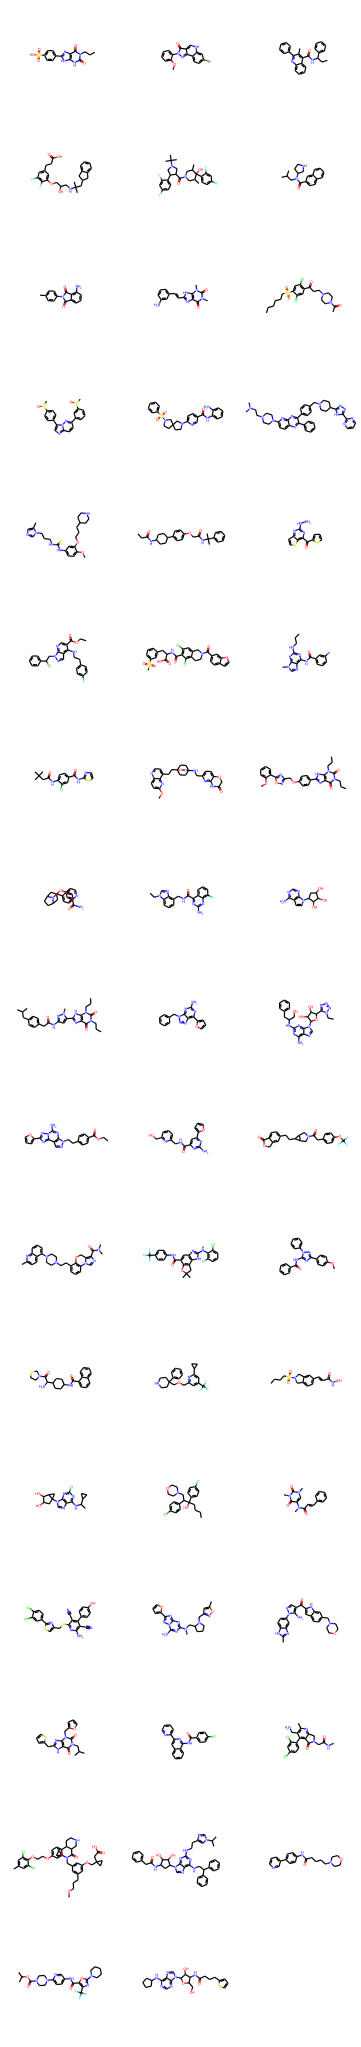

In [56]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in valid_decode_samples[:100]])